
## Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import seaborn as sns, pandas as pd, numpy as np

## Question 1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [3]:
### BEGIN SOLUTION
data = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


The data columns are all floats except for the activity label.


In [5]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [6]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [7]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

- The above result shows that only column which is object type is "Activity" and is the last column, which we are trying to predict or catagories for different strings
- The data is already scaled from -1 (minimum) to 1.0 (maximum). Lets check the min and max values.

In [8]:
# we took all rows and exclude last column by -1 after : as last column is object column
# we can also used the drop command X = data.drop('Activity', axis=1)
data.iloc[:, :-1].min()
# The result shows that min value of the feature variables is -1

tBodyAcc-mean()-X                      -1.0
tBodyAcc-mean()-Y                      -1.0
tBodyAcc-mean()-Z                      -1.0
tBodyAcc-std()-X                       -1.0
tBodyAcc-std()-Y                       -1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)       -1.0
angle(tBodyGyroJerkMean,gravityMean)   -1.0
angle(X,gravityMean)                   -1.0
angle(Y,gravityMean)                   -1.0
angle(Z,gravityMean)                   -1.0
Length: 561, dtype: float64

In [9]:
data.iloc[:, :-1].min().value_counts() 

-1.0    561
dtype: int64

In [10]:
data.iloc[:, :-1].max()#.value_counts() 

tBodyAcc-mean()-X                       1.0
tBodyAcc-mean()-Y                       1.0
tBodyAcc-mean()-Z                       1.0
tBodyAcc-std()-X                        1.0
tBodyAcc-std()-Y                        1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)        1.0
angle(tBodyGyroJerkMean,gravityMean)    1.0
angle(X,gravityMean)                    1.0
angle(Y,gravityMean)                    1.0
angle(Z,gravityMean)                    1.0
Length: 561, dtype: float64

In [11]:
data.iloc[:, :-1].max().value_counts() # the result shows the max value and its counts

1.0    561
dtype: int64

In [12]:
#data.describe()

The above results shows that, for every columns (except last column 'Activity'), all the min values are -1 and all the max values and 1 with counts or no of values 561

Examine the breakdown of activities; they are relatively balanced.


In [13]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.\
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].value_counts()#sample(5)
### the result shows that each of the six string catagories are converted into integers

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

## Question 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


In [15]:
#Example
a = np.arange(16).reshape(4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [16]:
#Example
#  tril_indeces_from gives array of INDEX NO's (row no's) of the lower  and upper triangular elements. 
#  The first array gives index nos (row no's) of lower triangle element and 2nd array(rows) gives 
#  index no's of upper triangle
trili = np.tril_indices_from(a)
pd.DataFrame(trili)  #OR
#trili

,0,1,2,3,4,5,6,7,8,9
0,0,1,1,2,2,2,3,3,3,3
1,0,0,1,0,1,2,0,1,2,3


In [17]:
# calculating correlation betwee feature variables
feature_cols = data.columns[:-1]  # -1 after : will remove last column of "Activity"
corr_values = data[feature_cols].corr()
corr_values.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511


- this is correlational matrix, the rows and column are showing same things i.e 1st row and 1st column is giving correlational values of tBodyAcc-mean()-X. similarly the 2nd row and 2nd column and so on.


In [18]:
# we remove values below the diagonaland keep the values above the diagonal
tril_index = np.tril_indices_from(corr_values) #  tril_indeces_from gives array of row numbers or 
tril_index                                  # INDEX NO of the lower & upper triangular element

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [19]:
corr_array=np.array(corr_values)
corr_array[np.tril_indices_from(corr_values)]=np.nan #we convert index values of lower traingle to nan
pd.DataFrame(corr_array)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
1,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
2,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
3,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
4,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [20]:
#we created DataFrame of corr_array and we columns = orginal columns and index equals original idexes
corr_values= pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


- Now the above matrix contains same no's of rows and columns i.e 561 and same no of rows and column are showing values of the same thing i.e first row & columns is showing values of tBodyAcc-mean()-X	and so on but the values under the diagonal is NaN
- to get correlation value of one feature against all other features we Stack the data so that columns showing values will show correlations value of a single thing (in one row) against other things (in relevant rows)

In [21]:
corr_values = (corr_values
               .stack()
               .to_frame())           
corr_values

0
tBodyAcc-mean()-X                    tBodyAcc-mean()-Y     0.128037
                                     tBodyAcc-mean()-Z    -0.230302
                                     tBodyAcc-std()-X      0.004590
                                     tBodyAcc-std()-Y     -0.016785
                                     tBodyAcc-std()-Z     -0.036071
...                                                             ...
angle(tBodyGyroJerkMean,gravityMean) angle(Y,gravityMean) -0.004582
                                     angle(Z,gravityMean) -0.012549
angle(X,gravityMean)                 angle(Y,gravityMean) -0.748249
                                     angle(Z,gravityMean) -0.635231
angle(Y,gravityMean)                 angle(Z,gravityMean)  0.545614

[157080 rows x 1 columns]

In [22]:
# resetting index of the data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index())
               
corr_values

,level_0,level_1,level_2,0
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,0,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,0,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,0,-0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",0,-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",0,-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",0,-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",0,-0.635231


In [23]:
#  renaming index level_0 as feature1, level_1 as feature2 and 0 as correlation
corr_values = (corr_values
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))
corr_values
# now the undermentioned table is showing correlations of one feature with all other features in a 
# sequence of rows 

,feature1,feature2,level_2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,0,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,0,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,0,-0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",0,-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",0,-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",0,-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",0,-0.635231


In [24]:
#creatg column'abs_correlation'to get absolute valuesas we need to see only magnitude of correlations
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values

,feature1,feature2,level_2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,0,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,0,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,0,-0.036071,0.036071
...,...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",0,-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",0,-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",0,-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",0,-0.635231,0.635231


A histogram of the absolute value correlations.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

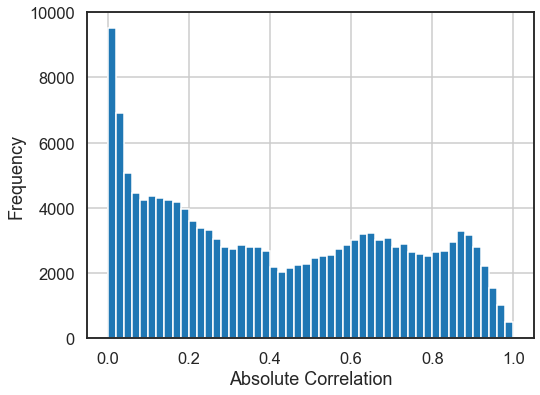

In [26]:
sns.set_context('talk')
sns.set_style('white')
# from the dataframe corr_values, we chose values under column abs_correlation for histogram
ax = corr_values.abs_correlation.hist(bins=50, figsize=(8, 6))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [27]:
# The most highly correlated values
# We sort the values by correlation with ascending=false
# we filter the data for abs_correlation>0.8 by using command .query()
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,level_2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),0,1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),0,1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),0,1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),0,1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),0,1.000000,1.000000
...,...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",0,-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",0,-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",0,-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",0,-0.994764,0.994764


In [28]:
corr_values.shape  # now the size is 157080 rows with 5 columns

(157080, 5)

In [29]:
data.shape

(10299, 562)

## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
# Get the split indexes  n_splits=1 mean there is one split i.e one traing and one test set
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,   #
                                          test_size=0.3, 
                                          random_state=42)

next(strat_shuf_split.split(data[feature_cols], data.Activity))
# the above command is a generator object which split the data into the train and test sets as per 
# test size and as per split value. First array is of train indeces and 2nd array is of test indeces. 
#we can also see in a DataFrame by the undermentioned command
#pd.DataFrame(next(strat_shuf_split.split(data[feature_cols], data.Activity)))

(array([1575, 1707, 6425, ..., 3037, 3002,  996], dtype=int64),
 array([7743,  969, 3175, ..., 8914, 8756, 1470], dtype=int64))

In [31]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes  n_splits=1 mean there is one split i.e one traing and one test set
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,   #
                                          test_size=0.3, 
                                          random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
# the generator object split the data into train and test indeces
# Create the dataframes
X_train = data.loc[train_idx, feature_cols] # we locate all rows of Xtraing set by train_indx along   
                                            # with its cols i.e columns of feature variables
y_train = data.loc[train_idx, 'Activity']# we locate all rows of  for ytrain, by train_indx and 
                                            # its column i.e column of y set 
X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [32]:
y_train.value_counts()

0    1361
2    1334
1    1244
3    1205
5    1081
4     984
Name: Activity, dtype: int64

In [33]:
y_train.value_counts(normalize=True)
 # normalize=True gives ratio or frequency among the values of a dataset 

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [34]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

In [35]:
pd.DataFrame(X_test.value_counts(normalize=True))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","

In [36]:
pd.DataFrame(X_train.value_counts(normalize=True))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","

## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


## Logistic Regression (aka logit, MaxEnt) classifier.
This class implements regularized logistic regression using the liblinear library, newton-cg and lbfgs solvers. It can handle both dense and sparse input.
**solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}**
The newton-cg and lbfgs solvers support only L2 regularization with primal formulation. 
The liblinear solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty.
- liblinear” (A Library for Large Linear Classification):

It’s a linear classification that supports logistic regression and linear support vector machines.liblinear applies L1 Regularization and it’s recommended when we have high dimension dataset (recommended for solving large-scale classification problems). Also good for small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ is faster for large ones. liblinear is also good when we need to predict classes and classes result are predicted one versus rest the result of the rest of the classes.
- For multiclass problems, only ‘newton-cg’ and ‘lbfgs’ handle
- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty.

In [37]:
#For small datasets, ‘liblinear’ is a good choice  we are trying to predict one vs the rest, and then
# another class for the rest till 6 different times for each one of the 6 classes. liblinear is one
# of the way to optimize when we are using one versus the rest eg standing vs not standing etc

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

- Each of the values in Cs describes the inverse of regularization strength i.e opposit to alpha. If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4. Like in support vector machines, smaller values specify stronger regularization. The 

- L2 penalty function uses the sum of the squares of the parameters.
- L1 penalty function uses the sum of the absolute values of the parameters and Lasso encourages this sum to be small.

In [38]:
# for cross validation method, we import logisticRegressionCV i.e.regression with CV(cross validation)
# which allows to loop through many hyperparameters like different C values, here value is 10 so the
# model will check it across for 10 different default values of C. cv=4 i.e 4 cross validation sets or
# holdout sets. result will show which values of C will optimize the holdout set.
from sklearn.linear_model import LogisticRegressionCV
# l1 penalty
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [39]:
# L2 penalty
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [87]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for labels,models in zip(coeff_labels, coeff_models):
    coeffs = models.coef_         # we pull out coefficients from models

# Multi-index allows you to select more than one row and column in your index    
# created Multi level Index of coeff_label consist of 2 levels(rows) of [labels] and [0,1,2,3,4,5]
#1st level is of labels the name of actual models lr, l1, l2 in the first row
#2nd level,the row of columns headings[0,1,2,3,4,5] (to match with num values of Activity column/yset) 
# Under these values as columns headings, will show coefficients for each of the models. 

    coeff_label = pd.MultiIndex(levels=[[labels], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0],[0,1,2,3,4,5]]) 
# codes mean the order of the headings of the two levels tied together like 
# 0 0, 0 1, 0 2, 0 3, 0 4, 0 5 for lr. 1 0, 1 1, 1 2, 1 3, 1 4, 1 5 for l1 similary for l2
# first digit represent model and 2nd for column heading under the respective model
# The 1st column of each model will be 0 0 (1st zero for lr, 2nd zero for column 0),2nd column as 0 1.
# 0 for lr & 1 for column 1. 1 0 (1 for l1, 0 for column 0). 2,0 (2 for l2, 0 for column 0) and so on. 
    
# append the coeeficients list and Transpose them into a column with column headings as coeff_labels
# i.e two rows of headings.1st is model name and 2nd row is of column headings 0,1,2,3,4,5
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label)) 

coefficients = pd.concat(coefficients, axis=1)
#concatenate each of the coeefficients list as dataframe against each one of the columns by axis=1
# otherwise output will be arrays of each model

coefficients.head(5) 

lr                                                          l1  \
          0         1         2         3         4         5         0   
0 -0.087506 -0.445226  0.254689 -0.169282  0.765612 -0.080084 -0.462402   
1  0.014493 -0.201046  0.060726 -0.023509  0.107966 -0.247193  0.000000   
2  0.030187  0.063196  0.241994  0.022340  0.058979 -0.402526  0.000000   
3  0.004590 -0.733963 -0.352622 -0.701327  0.266984  0.696120  0.000000   
4 -0.045407 -0.034154 -0.450546  0.260236 -0.516845  0.106248  0.003558   

                                                           l2            \
          1         2         3         4         5         0         1   
0  0.000000  0.000000 -1.308210  3.882396  0.000000 -0.135283 -1.347886   
1  0.000000  0.000000 -4.723384  0.000000  0.000000  0.029334 -1.137032   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.040581 -1.419430   
3 -1.585843 -0.234032 -2.154497  0.078191  1.846796  0.019091 -2.562851   
4  0.000000 -1.317333  1.221997 -0.982268  0.000000 -0.035987  0.604744   

                                           
          2         3         4         5  
0  1.205943 -0.478945  3.384710  0.021710  
1  0.291916 -0.153950  0.363186 -0.536633  
2  1.571817  0.134551  0.037064 -0.961436  
3 -0.668682 -1.788844  0.414907  1.763632  
4 -1.523733  0.902899 -1.732837  0.071042

In [88]:
coeff_label

MultiIndex([('l2', 0),
            ('l2', 1),
            ('l2', 2),
            ('l2', 3),
            ('l2', 4),
            ('l2', 5)],
           )

In [41]:
 # samples of 10
coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
414 -0.004933  0.169036  0.198679  0.037651  0.028239  0.168044 -0.000107   
430 -0.021036 -0.267203  0.083885  0.351225 -0.137153 -0.233154 -0.243275   
253 -0.009327 -0.091213  0.253074  0.012661  0.037661 -0.240968 -0.076445   
273 -0.011360 -0.070934 -0.363658 -0.036201 -0.075844  0.341680 -0.027652   
86  -0.067421 -0.321993 -0.334633  0.055854 -0.141596  0.115792 -0.141260   
529  0.011535  0.276308 -0.052952  0.081602  0.004026 -0.084161 -0.003744   
206  0.024451 -0.113410 -0.023078 -0.621019 -0.027569 -0.490645  0.110373   
212  0.067467  0.163853 -0.347638 -0.395371  0.056092  0.483722  0.320166   
291  0.189012  0.404345 -0.627762 -0.112064  0.518130 -0.087799  0.037638   
533  0.000644 -0.005133  0.012845 -0.362789  0.154670 -0.385035 -0.020245   

                                                             l2            \
            1         2         3         4         5         0         1   
414  0.000000  0.000000  0.146257  0.032563  0.313103 -0.028785  0.329697   
430  0.000000  0.000000  0.654174 -0.332460 -0.091742 -0.034144 -1.120663   
253  0.000000  0.000000  0.088125  0.000000 -0.007252 -0.024489 -0.489893   
273  0.000000 -0.001134  0.202236  0.000000  0.000000 -0.002079  0.134059   
86   0.000000  0.000000 -0.022985  0.000000  0.000000 -0.114100 -1.123292   
529  0.000000  0.000000  0.171403  0.581119 -0.272348  0.034107  0.306466   
206  0.000000  0.000000 -0.900509  0.000000 -0.522597  0.042324 -0.081591   
212  0.000000 -0.252555 -1.857268  0.000000  1.453720  0.157606  0.467394   
291  0.047679 -0.444140 -0.071294  0.603529  0.000000  0.358136 -0.000686   
533  0.000000  0.000000 -1.381229  0.214715 -0.767428  0.010137 -0.109925   

                                             
            2         3         4         5  
414  0.423219  0.047852 -0.207664  0.658813  
430  0.756557  0.829623 -0.486293 -0.602498  
253  0.746058 -0.006360  0.124092 -0.425593  
273 -1.357437 -0.046639 -0.165261  0.664191  
86  -0.642140 -0.027819 -0.750918  0.366335  
529 -0.143033  0.354562  0.162532 -0.249906  
206 -0.064198 -1.437614 -0.427280 -1.003339  
212 -0.365598 -0.974128  0.094000  1.110125  
291 -0.927302 -0.795913  1.869894  0.240422  
533  0.074328 -1.156131  0.595366 -0.819822

- The above result shows the coefficients of feature variables for three models lr, l1, l2  (in verticle form due to use of transpose function) against each type of values LAYING, STANDING, SITTING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS (which were converted in to numerical forms 0,1,2,3,4,5) under column "Activity" 



In [42]:
coefficients.shape

(561, 18)

Prepare six separate plots for each of the multi-class coefficients.


- The .loc property of the DataFrame object allows the return of specified rows and/or columns from that DataFrame. It can do so using a label or label(s), or a boolean array of the same size as the axis being filtered. .loc is not a method, it is a property indexed via square brackets. the Square brackets are specified indices for rows and, optionally, specified indices for columns

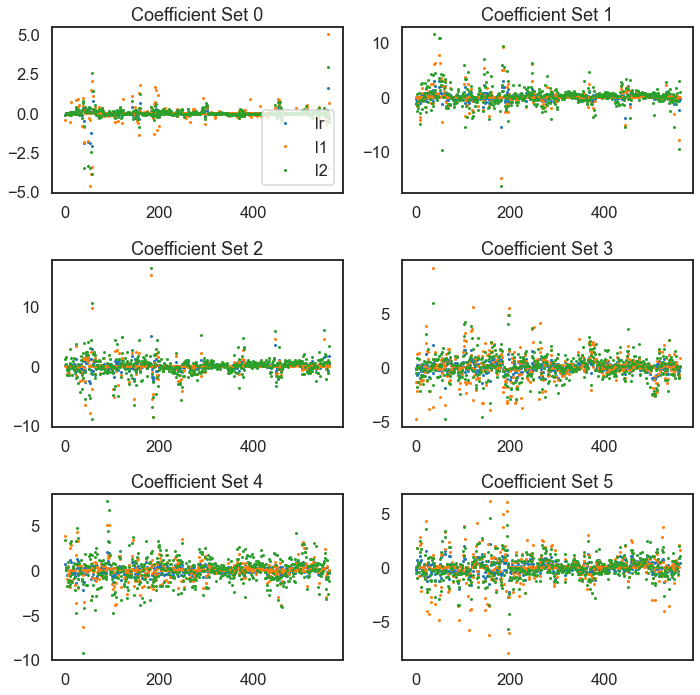

In [43]:
fig, axList = plt.subplots(nrows=3, ncols=2) # we created subplots & initiate a figure and axList. 
                                #axlist is of  3 rows and 2 cols so that there will 6 bounding boxes
axList = axList.flatten() # flatten the axList to reduce size to run easier in a forloop
fig.set_size_inches(10,10) # the size of the entire figure containing 6 bounding boxes

for loc, ax in enumerate(axList): #.loc will locate relevant numerical values 0,1,2,3,4,5 of axList.
    #loc = ax[0]              #  ax is relevant bounding boxes. enumerate() will enumerate axList
    #ax = ax[1]               #  by showing relevant no (taken from loc) with relevant ax/bounding box

#The xs() method returns a specified section of the DataFrame.here it takes loc values of level 1
# i.e. 0,1,2,3,4 & 5 exist at level=1(2nd row) of the coefficients for multiple columns(axis=1)
# loc will locate values at level=1 i.e.each 0's,1's, so on i.e. 0 for lr, 0 for l1, 0 for l2 
#then similary for 1, 2,3,4,5.Note lr, l1 & l2 are present at level 0. 
    data = coefficients.xs(loc, level=1, axis=1) 
    
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False) # ax=ax means we plot in the axis 
                                                        # defined in the bounding box
    if ax is axList[0]:    # if ax in axList is 0 i.e if it is 1st value/pic of axList 
        ax.legend(loc=4)    # then plot the legend on 1st value/1st pic at location 4 of pic
        
    ax.set(title='Coefficient Set '+str(loc)) # we set title. +str(loc) will add string of  
                                                # relevant number from 0 to 6 of loc value.
plt.tight_layout()
### END SOLUTION

## Question 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [95]:
pd.DataFrame(lr_l1.predict_proba(X_test))  # prediction of probabilities of model lr_l1
                                        # its 3090 rows of 6 columns 

,0,1,2,3,4,5
0,6.248662e-06,5.954388e-06,1.030554e-03,9.989572e-01,8.240746e-10,4.593878e-08
1,8.654687e-06,1.071277e-08,1.096483e-07,2.346699e-08,4.644652e-04,9.995267e-01
2,3.022201e-06,3.751751e-03,2.296578e-07,9.951812e-01,1.058512e-03,5.272057e-06
3,8.689712e-07,9.992018e-01,7.973665e-04,7.894903e-17,4.682827e-10,8.108867e-23
4,9.999213e-01,7.872675e-05,2.696352e-14,1.255716e-16,2.316420e-10,4.468518e-20
...,...,...,...,...,...,...
3085,8.051710e-07,4.860600e-01,5.139276e-01,1.162265e-05,1.286825e-10,1.572943e-08
3086,5.537259e-06,1.291694e-05,7.053393e-07,9.866512e-01,8.275671e-08,1.332951e-02
3087,5.670856e-08,9.834082e-01,1.659179e-02,7.960903e-18,3.267044e-10,1.314214e-11
3088,4.466926e-08,9.979744e-01,2.266074e-05,6.035077e-15,2.381464e-12,2.002876e-03


In [109]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    
    coeff_label = pd.MultiIndex(levels=[[label], [0,1,2,3,4,5]],
                                 codes=[[0,0,0,0,0,0],[0,1,2,3,4,5]]) 
    
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test), columns=coeff_label))
    #y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [130]:
# to see indeces where results does not same of differs for different models. != not equal operator
y_pred[y_pred.lr != y_pred.l1] 

,lr,l1,l2
88,2,1,1
197,2,1,1
296,1,2,2
388,1,2,1
430,4,5,5
489,2,1,1
769,4,3,3
853,5,3,3
1036,1,2,1
1071,1,2,2


In [67]:
y_prob.head()
### END SOLUTION

lr                                                                    \
          0             1             2             3         4             5   
0  0.000034  1.683476e-04  5.670299e-04  9.989394e-01  0.000006  2.845352e-04   
1  0.000037  3.211751e-07  4.162162e-06  1.424937e-04  0.011650  9.881655e-01   
2  0.000036  4.352812e-03  2.941421e-06  9.875917e-01  0.005011  3.006537e-03   
3  0.000223  9.813368e-01  1.842831e-02  1.419728e-07  0.000012  1.288256e-12   
4  0.998277  1.717725e-03  2.915493e-09  2.088943e-07  0.000005  1.393959e-10   

             l1                                                          \
              0             1             2             3             4   
0  6.248662e-06  5.954388e-06  1.030554e-03  9.989572e-01  8.240746e-10   
1  8.654687e-06  1.071277e-08  1.096483e-07  2.346699e-08  4.644652e-04   
2  3.022201e-06  3.751751e-03  2.296578e-07  9.951812e-01  1.058512e-03   
3  8.689712e-07  9.992018e-01  7.973665e-04  7.894903e-17  4.682827e-10   
4  9.999213e-01  7.872675e-05  2.696352e-14  1.255716e-16  2.316420e-10   

                           l2                                            \
              5             0             1             2             3   
0  4.593878e-08  1.236823e-07  2.156968e-08  2.341970e-06  9.999969e-01   
1  9.995267e-01  2.672626e-07  4.922679e-14  3.444539e-12  1.035936e-09   
2  5.272057e-06  1.838581e-07  6.892258e-05  8.609048e-12  9.999046e-01   
3  8.108867e-23  1.322398e-07  9.998695e-01  1.303428e-04  9.042782e-17   
4  4.468518e-20  9.999974e-01  2.617415e-06  7.474802e-22  9.919938e-16   

                               
              4             5  
0  1.600260e-15  5.808215e-07  
1  1.157175e-06  9.999986e-01  
2  3.888144e-07  2.586546e-05  
3  4.042540e-16  2.258090e-21  
4  6.496160e-16  8.446231e-19

## Question 7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [132]:
score(y_test, y_pred['lr']) 
#1st array showing precision for each of the labels, 2nd array is of Recall, 3rd is of fscore, 
#last one is Support

(array([1.        , 0.9588015 , 0.96322242, 0.99613153, 0.99526066,
        0.99568035]),
 array([1.        , 0.96060038, 0.96153846, 0.99613153, 0.99526066,
        0.99568035]),
 array([1.        , 0.95970009, 0.9623797 , 0.99613153, 0.99526066,
        0.99568035]),
 array([583, 533, 572, 517, 422, 463], dtype=int64))

In [133]:
score(y_test, y_pred['lr'])[0]  # to see only first array of precision
# 2nd array is of Recall, 3rd is of fscore, last one is Support

array([1.        , 0.9588015 , 0.96322242, 0.99613153, 0.99526066,
       0.99568035])

In [135]:
#to get weighted average of each score precision, recall, fscore,support not required showing None
score(y_test, y_pred['lr'], average='weighted')

(0.9841438255400277, 0.9841423948220065, 0.984142828415666, None)

In [138]:
y_test.head()

7743    3
969     5
3175    3
8907    1
6368    0
Name: Activity, dtype: int32

In [140]:
label_binarize(y_test, classes=[0,1,2,3,4,5])
# the labelbinarizer convert 3rd class from 3 to [0, 0, 0, 1, 0, 0], 5th to [0, 0, 0, 0, 0, 1] ....
# now classes [0,1,2,3,4,5] are converted into binary classes as per no of classes

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [131]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [47]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.984164,0.984800
recall,0.984142,0.984142,0.984790
fscore,0.984143,0.984138,0.984788
accuracy,0.984142,0.984142,0.984790
auc,0.990384,0.990339,0.990741


## Question 8

*   Display or plot the confusion matrix for each model.


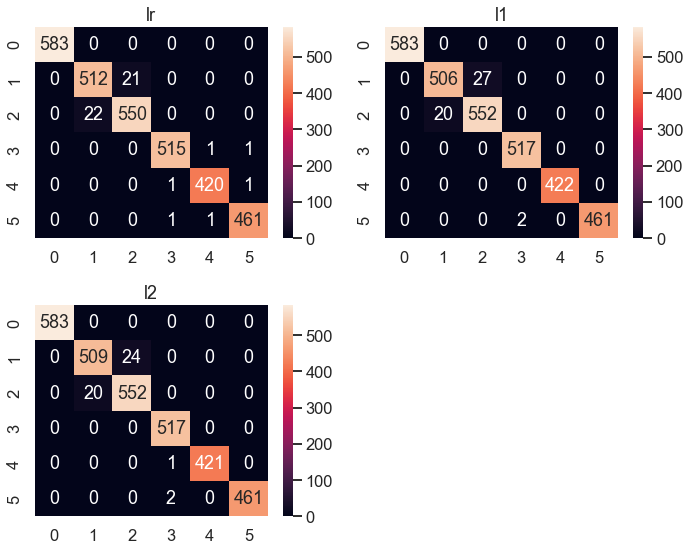

In [143]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

axList[-1].axis('off') #shut off the axis for the last one, axList[-1] is the last/4th plot

for ax,lab in zip(axList[:-1], coeff_labels): #removing values at -1 in axList by [:-1] 
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');  # heatmap of C Matrix of labels/models
    ax.set(title=lab);  # title=lab or models(lr, l1, l2)
    
plt.tight_layout()
### END SOLUTION

The row wise data is showing the actual values against the classes or catagories whereas column wise data is showing prediction. so we see results at intersection of 0 0,1 1, 2 2, 3 3, 4 4, 5 5 regarding actual vs predictions in all the models lr, l1, l2
- The above result shows that for class 1 represented by 0, the result is same as 583 in all the models. so watch is showing accuracy results if person is laying for any of the three models
- For Sitting, 2nd catagory (represented by 1), the watch is confused as showing higher differences among model values. showing value 512 in l1, showing value 506 in l2, showing value 509 in l3
-  models are showing accuracy for standing & walking among prediction and actual 
- the result of class4 i.e Walking_downstairs are also showing accuracy
- the results of class 5 are same in all the models so correct results by the watch if walking upstairs
CLASSES are :'LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'

In [141]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

***

### Machine Learning Foundation (C) 2020 IBM Corporation
